In [1]:
import math
import numpy as np
import pandas as pd
import sympy as sy
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
plt.style.use(['science','notebook','grid'])
from skimage import color 
from skimage import io
from itertools import combinations

# The free fall problem 

The equation for the height of a thrown ball is $y=-\dfrac{1}{2}gt^2 + v_0t$

* $t$ is the time
* $y$ is the height of the ball
* $v_0$ is the initial upward speed of the ball
* $g$ is the gravity


In [ ]:
v_0, g = 50, 9.8
tf,ti, n = 10, 0, 100
t = np.linspace(ti,tf,n)

In [ ]:
y = -1/2*g*t**2+v_0*t

In [ ]:
plt.plot(t,y)
plt.xlabel('Time')
plt.ylabel('Height')
plt.title("The free fall problem ")
plt.grid()
plt.show()

# The free fall problem with friction 
An $80kg$ person jumps out of an airplane moving at $50m/s$ horizontally. Let their velocity be given by $\vec v=(v_x,v_y)$. The friction force is given by $\vec F_f=-b|\vec v|^2\hat v$ and gravity is given by $\vec F_g=-mg\hat y$. The terminal velocity is know to be $v_t=-55m/s$. Find the velocity $\vec v(t)$ at all times and determine how long it takes until the skydiver gets within 1% of the terminal velocity.

\begin{gathered}
\frac{d v_{x}}{d t}=-\frac{b}{m} \sqrt{v_{x}^{2}+v_{y}^{2}} \cdot v_{x} \\
\frac{d v_{y}}{d t}=-g-\frac{b}{m} \sqrt{v_{x}^{2}+v_{y}^{2}} \cdot v_{y}
\end{gathered}

In [ ]:
t = np.linspace(0,20,100)
m = 80
g=9.81
vt = -55
b = m*g/vt**2
vx0, vy0 = 50, 0

In [ ]:
def dvdt(v,t,g,m,b):
    vx = v[0]
    vy = v[1]
    return [
        -b/m*np.sqrt(vx**2+vy**2)*vx,
        -g-b/m*np.sqrt(vx**2+vy**2)*vy
    ]

In [ ]:
solution = odeint(dvdt, [vx0,vy0], t, args=(g, m, b))

In [ ]:
vx = solution.T[0]
vy = solution.T[1]

In [ ]:
plt.plot(t,vx, label='vx')
plt.plot(t,vy, label='vy')
plt.legend()
plt.axhline(vt, color='r')
plt.show()

In [ ]:
v = np.sqrt(solution.T[0]**2 + solution.T[1]**2)

In [ ]:
t[np.abs(vy - vt)/np.abs(vt) < 1/100]

# Function and is distribution 
Let $y=e^{-x/10}sin(x)$. Consider 10000 x intervals in the range $[0,10]$ 

1. Plot the function $y$ vs $x$ in the range $[0,10]$
2. Compute the mean and standard deviation of $y$ for $x$ values in $[4,7]$
3. For $x$ in the range $[4,7]$, find the value $y_m$ such that $80%$ of y values are less than $y_m$
4. Plot $dy/dx$ vs x
5. Find the locations where $dy/dx = 0$ 

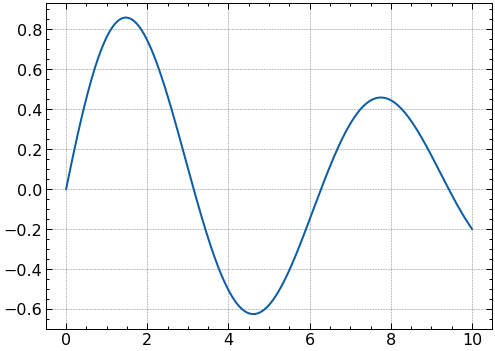

In [23]:
N=10000
x = np.linspace(0,10,N+1)
y = np.exp(-x/10)*np.sin(x)
plt.plot(x,y) 

In [24]:
np.mean(y[(x>=4)*(x<=7)])

-0.2956023068963138

In [25]:
np.std(y[(x>=4)*(x<=7)])

0.31448753875085117

In [26]:
np.percentile(y[(x>=4)*(x<=7)],80)

0.06145551274590662

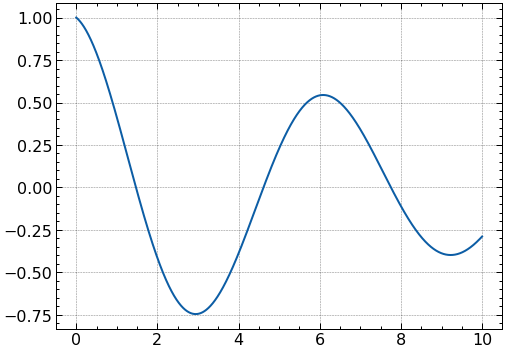

In [27]:
plt.plot(x,np.gradient(y,x))

In [28]:
dydx=np.gradient(y,x)

In [29]:
x[1:][dydx[1:]*dydx[:-1]<0]

array([1.472, 4.613, 7.755])

# Sum 
Sum together every nuymber from 0 to 10000 except for those than can be divided by 4 or 7

In [ ]:
sum = np.linspace(0,10000,10001)
np.sum((sum[(sum%4!=0)*(sum%7!=0)]))

# Function 
Consider the flower petal $r(\theta)=1+\dfrac{3}{4}\sin(3\theta)$ for $0 \leq \theta \leq 2\pi$ 

1. Make a plot of the flower (find x an y points)
2. Compute the area using the calculues formula $A=\int_0^{2\pi}\dfrac{1}{2}r^2d\theta$
3. Compute the arclength using the calculus formula $L=\int_0^{2\pi}\sqrt{r^2+\left(\dfrac{dr}{d\theta}\right)^2}d\theta$

In [ ]:
theta = np.linspace(0,2*np.pi,1000)
r = 1+3/4*np.sin(3*theta)
x = r*np.cos(theta)
y = r*np.sin(theta)
plt.plot(x,y)

In [ ]:
A = 1/2*np.sum(r**2)*(theta[1]-theta[0])
A

# Derivatives 

## Symbolic

In [ ]:
x, a, b, c = sy.symbols('x, a, b, c', real = True)
f = sy.exp(-a*sy.sin(x**2))*sy.sin(b**x)*sy.log(c*sy.sin(x)**2/x)
dfdx = sy.diff(f,x)
dfdx.simplify()

In [ ]:
dfdx.subs([(x,4),(a,1),(b,2),(c,3)]).evalf()

In [ ]:
dfdx_f=sy.lambdify((x,a,b,c), dfdx)

In [ ]:
x = np.linspace(1,2,100)
y = dfdx_f(x,a=1,b=2,c=3)
plt.plot(x,y)

In [ ]:
x = sy.Symbol('x')
f, g = sy.symbols('f g', cls=sy.Function)
g = g(x)
f = f(x + g)
f

In [ ]:
sy.diff(f)

## Numeric

# Integrals 

## symbolic

In [ ]:
x = sy.symbols('x', real=True)
f = sy.sin(x)**3*sy.exp(-5*x)
sy.integrate(f,x)

In [ ]:
a, b = sy.symbols('a b',real=True, positive=True)
f = sy.cos(b*x)*sy.exp(-a*x)
sy.integrate(f,x).simplify()

In [ ]:
f = (1+sy.sqrt(x))**sy.Rational(1,3)/sy.sqrt(x)
sy.integrate(f,x).simplify()

In [ ]:
f = sy.exp(x)/sy.sqrt(sy.exp(2*x)+9)
sy.integrate(f,(x,0,sy.log(4))).evalf()

In [ ]:
f = 16*sy.atan(x)/(1+x**2)
sy.integrate(f,(x,0,sy.oo))

## Numeric

In [ ]:
f = lambda x: np.exp(-np.sin(x))
sp.integrate.quad(f,1,2)

In [ ]:
f = lambda x: 1/((a-np.cos(x))**2+(b-np.sin(x))**2)
a,b =2,3
sp.integrate.quad(f,0,2*np.pi)

In [ ]:
x = np.linspace(0,10,10000)
f = x**2
integral = sp.integrate.cumulative_trapezoid(f,x,initial=0)

In [ ]:
plt.plot(x,f)
plt.plot(x,integral)

# Function in two dimentions 
Let $f(x,y)=e^{-(x^2+y^2)}\sin(x)$ for $-2 \leq x \leq2$ and $-2 \leq y \leq2$
1. Make a contour plot of $f$
2. Find the volume $|f(x,y)|$ in the specified x and y range
3. Find the volume $|f(x,y)|$ only in the region where $\sqrt{x^2+y^2}>0$ 

In [ ]:
x = np.linspace(-2,2,1000)
y = np.linspace(-2,2,1000)
xv, yv = np.meshgrid(x, y)
f = np.exp(-(xv**2+yv**2))*np.sin(xv)
plt.contourf(xv,yv,f,levels=100)
plt.colorbar()

In [ ]:
np.abs(f).ravel().sum()*np.diff(x)[0]*np.diff(y)[0]

# electric circuit  
After examining a circuit full of resistors, you find that the voltage at 4 specified points is given by

$\begin{aligned}
&3 V_{1}+2 V_{2}+3 V_{3}+10 V_{4}=4 \\
&2 V_{1}-2 V_{2}+5 V_{3}+8 V_{4}=1 \\
&3 V_{1}+3 V_{2}+4 V_{3}+9 V_{4}=3 \\
&3 V_{1}+4 V_{2}-3 V_{3}-7 V_{4}=2
\end{aligned}$

Find all the voltages

In [ ]:
M = np.array([[3,2,3,10],[2,-2,5,8],[3,3,4,9],[3,4,-3,-7]])
N = np.array([[4],[1],[3],[2]])
V = np.linalg.solve(M,N)

In [ ]:
np.linalg.inv(M)@N

In [ ]:
M@V

# Electric field
An electric field is given by $\vec E(z,t)=E_0\cos(z-t)\hat x + 2E_0cos(z-t+\pi /2) \hat y$
1. Find the magnetic field for all $z \in [0,4\pi]$ and $t \in [0,10]$ using $\vec B(z,t) = \hat z \times \vec E(z,t)$
2. Compute the Poynting vector $\vec S = \vec E \times \vec B$ for all $z$ and $t$  

In [ ]:
z = np.linspace(0,4*np.pi,1000)
t = np.linspace(0,10,1000)

tv, zv = np.meshgrid(t,z)

Ex = np.cos(zv-tv)
Ey = 2*np.cos(zv-tv+np.pi/2)
Ez = 0*tv

plt.plot(t, Ex[0][:])
plt.plot(t, Ex[100][:])

In [ ]:
E = np.array([Ex, Ey, Ez])
E = np.swapaxes(E, 0, -1)
B = np.cross(np.array([0,0,1]), E)
B = np.swapaxes(B, 0, -1)
Bx, By, Bz = B

In [ ]:
plt.plot(t, Ey[0][:])
plt.plot(t, Bx[0][:])

# Matplotlib

In [ ]:
x = np.linspace(0,15,30)
y = np.sin(x) + 0.1*np.random.randn(len(x))
x2=np.linspace(0,15,100)
y2=np.sin(x2)

In [ ]:
plt.plot(x,y)

In [ ]:
plt.figure(figsize=(16,9))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(top=2, bottom=-2)
plt.plot(x,y,'o--', color='purple', lw=0.5, ms=5, label='component 1')
plt.plot(x2,y2, color='green', lw=1, ms=5, label='component 2')
plt.legend(loc='upper right', fontsize=15)

In [ ]:
res = np.random.randn(1000)*0.2+0.4

In [ ]:
plt.figure(figsize=(8,3))
plt.hist(res,bins=30,density=True, histtype='step')

# First Order ODEs
$\dfrac{dv}{dt}=\alpha v^2-\beta \qquad v(0)=0$

In [ ]:
def dvdt(t,v):
    return 3*v**2-2
v0 = 0

In [ ]:
t = np.linspace(0,1,100)
sol_m1 = odeint(dvdt, y0=v0, t=t, tfirst=True)
sol_m2 = solve_ivp(dvdt, t_span=(0,max(t)), y0=[v0], t_eval=t)

In [ ]:
plt.plot(t,sol_m2.y[0])

In [ ]:
plt.plot(t,sol_m1)

# Coupled First Order ODEs
$y'_1=y_1+y_2^2+3x \qquad y_1(0)=0$

$y'_2=3y_1+y_2^3-\cos(x) \qquad y_2(0)=0$

In [ ]:
def dSdx(x,S):
    y1, y2 = S
    return [y1+y2**2+3*x,
           3*y1+y2**3-np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0,y2_0)

In [ ]:
x = np.linspace(0,1,100)
sol = odeint(dSdx,y0=S_0,t=x,tfirst=True)

In [ ]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

In [ ]:
plt.plot(x,y1_sol)
plt.plot(x,y2_sol)

# Second Order ODEs
Python does not have functions to directly solve second order ODEs. But any second order ODE can be converted into two first order ODEs

# Fourier transform (continuous time and frequency)

$\dot x(f) = \int_{-\infty}^\infty x(t)e^{-2\pi ift}dt$

## Solving analytically 

In [ ]:
t, f = sy.symbols('t, f', real=True)
k = sy.symbols('k', real = True, positive = True)
x = sy.exp(-k*t**2)*k*t
x

In [ ]:
x_FT = sy.integrals.transforms.fourier_transform(x,t,f)

In [ ]:
x_FT

# Interpolation 

In [ ]:
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
x_data = np.linspace(0,5,5)
y_data = x_data**2

In [ ]:
plt.scatter(x_data,y_data)

In [ ]:
y_f = interp1d(x_data, y_data, 'cubic')

In [ ]:
x_f = np.linspace(0,5,100)
plt.scatter(x_f,y_f(x_f))

# Limits 

In [ ]:
sy.limit(sy.sin(x/2+sy.sin(x)),x,sy.pi)

In [ ]:
sy.limit(sy.sin(x/2+sy.sin(x)),x,sy.pi, dir='+')

In [ ]:
sy.limit((sy.cos(x)-1)/x, x, sy.oo)

# Vectors and Geometry

In [ ]:
x, y, z, u1, u2, u3, v1, v2, v3, t = sy.symbols('x, y, z, u1, u2, u3, v1, v2, v3, t')

In [ ]:
u = sy.Matrix([u1,u2,u3])
v = sy.Matrix([v1,v2,v3])
v

In [ ]:
2*u+v

In [ ]:
u.dot(v)

In [ ]:
u.cross(v)

In [ ]:
u.norm()

In [ ]:
r = sy.Matrix([3*t, sy.sin(t), t**2])
r

In [ ]:
sy.diff(r,t)

In [ ]:
sy.Integral(r).doit()

# Pendulum Motion 

In [2]:
t, m, g = sy.symbols('t m g')
theta = sy.symbols(r'\theta', cls = sy.Function)
theta = theta(t)
theta
theta_d = sy.diff(theta, t)
theta_dd = sy.diff(theta_d, t)
x, y = sy.symbols('x y', cls = sy.Function)
x = x(theta)
y = y(theta)

In [3]:
path = 'parab'
if path == 'parab': 
    x = theta
    y = theta ** 2
    x_f = sy.lambdify(theta, x)
    y_f = sy.lambdify(theta, y)

In [4]:
T = sy.Rational(1/2) *m*(sy.diff(x,t)**2  + sy.diff(y,t)**2)
V = m*g*y
L = T-V

In [5]:
L

-g*m*\theta(t)**2 + m*(4*\theta(t)**2*Derivative(\theta(t), t)**2 + Derivative(\theta(t), t)**2)/2

In [8]:
LE = sy.diff(L, theta) - sy.diff(sy.diff(L,theta_d),t)
LE = LE.simplify()

In [9]:
LE

-m*(2*g*\theta(t) + 4*\theta(t)**2*Derivative(\theta(t), (t, 2)) + 4*\theta(t)*Derivative(\theta(t), t)**2 + Derivative(\theta(t), (t, 2)))

In [10]:
deriv_2 = sy.solve(LE, theta_dd)[0]
deriv_1 = theta_d 

In [11]:
deriv2_f = sy.lambdify((g,theta,theta_d), deriv_2)
deriv1_f = sy.lambdify((g,theta,theta_d), deriv_1)

In [13]:
deriv2_f(2,2,2)

-2.3529411764705883

In [19]:
def dSdt(S, t):
    return [
        deriv1_f(S[1]),
        deriv2_f(g, S[0], S[1])
    ]

In [7]:
n_particles = 400
r = np.random.random((2,n_particles))
ixr = r[0] > 0.5
ixl = r[0] <= 0.5

In [9]:
r

array([[9.69933253e-01, 9.42357825e-01, 9.21663844e-01, 2.85526295e-01,
        8.77043885e-01, 5.25845702e-01, 1.27018995e-01, 2.46362330e-01,
        9.98852660e-01, 2.66384464e-01, 5.15455466e-01, 8.01769249e-01,
        1.81478351e-01, 7.33585513e-01, 7.31831878e-01, 9.65147939e-01,
        8.14840779e-01, 9.46599675e-01, 1.61849663e-01, 8.68589260e-01,
        1.02852073e-01, 9.26077724e-01, 3.91152944e-01, 7.68614804e-01,
        6.10087207e-01, 6.07174257e-01, 9.36659012e-01, 2.64869314e-01,
        3.07115982e-01, 7.74883015e-02, 6.42302897e-01, 7.25307504e-01,
        4.65582626e-01, 2.54582238e-01, 6.36669124e-01, 1.32442221e-01,
        9.28835268e-01, 1.97103860e-01, 3.80907599e-01, 5.81652023e-01,
        1.73535877e-01, 1.73399314e-01, 1.60906228e-01, 5.31697198e-01,
        7.28673314e-01, 1.57354151e-01, 4.20833768e-01, 2.74533526e-01,
        3.46161162e-01, 4.32134079e-01, 8.62284009e-01, 3.34034111e-01,
        2.01551450e-01, 4.40676972e-01, 1.64125962e-01, 5.911861

In [12]:
ids = np.arange(n_particles)


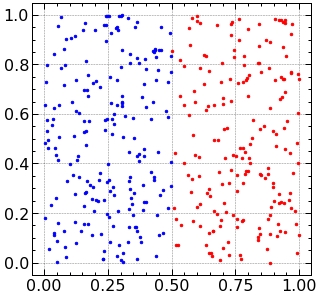

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(r[0][ixr],r[1][ixr], color='r', s=6)
plt.scatter(r[0][ixl],r[1][ixl], color='b', s=6)

In [17]:
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500

In [22]:
ids_pairs = np.asarray(list(combinations(ids,2)))

In [24]:
ids_pairs.size

159600

In [89]:
alpha = sy.symbols(r'\alpha', real=True, positive=True)
v = sy.symbols('v', real=True)
N = sy.symbols('N', cls=sy.Function)
N = N(alpha, v)

In [90]:
N = v**2*sy.exp(-alpha*v**2)

In [91]:
N.subs([(alpha,1),(v,2)]).evalf()

0.0732625555549367

In [100]:
v_var = np.linspace(0, 3, 100)
v_var

array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
       0.15151515, 0.18181818, 0.21212121, 0.24242424, 0.27272727,
       0.3030303 , 0.33333333, 0.36363636, 0.39393939, 0.42424242,
       0.45454545, 0.48484848, 0.51515152, 0.54545455, 0.57575758,
       0.60606061, 0.63636364, 0.66666667, 0.6969697 , 0.72727273,
       0.75757576, 0.78787879, 0.81818182, 0.84848485, 0.87878788,
       0.90909091, 0.93939394, 0.96969697, 1.        , 1.03030303,
       1.06060606, 1.09090909, 1.12121212, 1.15151515, 1.18181818,
       1.21212121, 1.24242424, 1.27272727, 1.3030303 , 1.33333333,
       1.36363636, 1.39393939, 1.42424242, 1.45454545, 1.48484848,
       1.51515152, 1.54545455, 1.57575758, 1.60606061, 1.63636364,
       1.66666667, 1.6969697 , 1.72727273, 1.75757576, 1.78787879,
       1.81818182, 1.84848485, 1.87878788, 1.90909091, 1.93939394,
       1.96969697, 2.        , 2.03030303, 2.06060606, 2.09090909,
       2.12121212, 2.15151515, 2.18181818, 2.21212121, 2.24242

In [96]:
N_fun = sy.lambdify((alpha,v), N)
N_fun(1,2)

0.07326255555493671

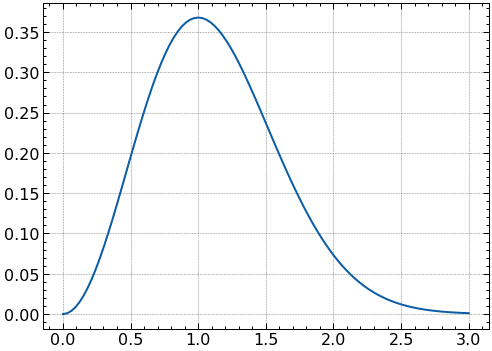

In [101]:
plt.plot(v_var, N_fun(1,v_var))

In [ ]:
a = np.linspace(1,100,100)
a

In [ ]:
a = 2*np.random.randn(1000) + 10

In [ ]:
np.mean(a)

In [ ]:
np.std(a)

In [ ]:
np.percentile(a,100)

In [ ]:
x = np.linspace(1,10,100)

In [ ]:
y = 1/x**2 * np.sin(x)**2
dydx = np.gradient(y,x)
y_int = np.cumsum(y)*(x[1]-x[0])

In [ ]:
plt.plot(x,y)
plt.plot(x,dydx)
plt.plot(x,y_int)
plt.show()

In [ ]:
class Retangulo:
    def __init__(self, x, y):
        self.x = x 
        self.y = y 

    def __repr__(self):
        return 'retangulo {} {}'.format(self.x, self.y)
    
    def __add__(self, other):
        novo_x = self.x + other.x
        novo_y = self.y + other.y
        return Retangulo(novo_x, novo_y)

r1 = Retangulo(1, 2)
r2 = Retangulo(2, 3)

r1.__repr__()

print(r1 + r2)

In [ ]:
class location:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y 


    @property  # criando uma propriedade que depende de outras propriedades 
    def loc(self):
        return [self.x, self.y]

    def move_left(self):
        self.x -= 1

    
    def move_right(self):
        self.x += 1


    def move_up(self):
        self.y += 1


    def move_down(self):
        self.y -= 1


    def __repr__(self):
        return f'{type(self).__name__}(x={self.x}, y={self.y})'

    
objeto = location()
print(objeto.loc)
objeto.move_up()
objeto.move_right()
print(objeto.loc)
print(objeto)
    

In [ ]:
def f1(func):
    def wrapper():
        print('Started')
        func()
        print("Ended")
        
    return wrapper


def f():
    print('hello')

    
    
f1(f)()




def f1(func):
    def wrapper():
        print('Started')
        func()
        print("Ended")
    return wrapper

@f1
def f():
    print('hello')


f()




def f1(func):
    def wrapper(*args, **kwargs):
        print('Started')
        func(*args, **kwargs)
        print("Ended")
    return wrapper

@f1
def f(*args, **kwargs):
    print(*args)
    for var, arg in kwargs.items():
        print(arg)


f(123, a="Real", b="Python", c="Is", d="Great", e="!")


In [ ]:
# concatenate.py
def concatenate(**kwargs):
    result = ""
    # Iterating over the Python kwargs dictionary
    for  var, arg in kwargs.items():
        print(arg)

concatenate(a="Real", b="Python", c="Is", d="Great", e="!")

In [ ]:
def f1():
    print('Called f1')

def f2(f):
    f()
    
f2(f1)

In [ ]:
while True:
    try:
        age = int(input('what is your age? '))
        print(age)
    except ValueError:
        print('please enter a number')
    else:
        print('thank you')
        break
